# Framing the Business Scenario

In [73]:
#Here is the background information on your task

1.An online retail store has hired you as a consultant to review their data and provide insights that would be valuable to the CEO and CMO of the business. The business has been performing well and the management wants to analyse what the major contributing factors are to the revenue so they can strategically plan for next year.

2.The leadership is interested in viewing the metrics from both an operations and marketing perspective. Management also intends to expand the business and is interested in seeking guidance into areas that are performing well so they can keep a clear focus on what’s working. They would also like to view different metrics based on the demographic information that is available in the data.

3.A meeting with the CEO and CMO has been scheduled for next month and you need to draft the relevant analytics and insights that would help evaluate the current business performance and suggest metrics that would enable them to make the decision on expansion.

4.Remember, thinking from the perspective of business leaders allows you to analyse the data more effectively and present better insights.

In [74]:
#Here is your task

1.To prepare for your meeting, you need to draft questions that you think will be important and relevant to the CEO and CMO. This preparation will be your guide as you develop your presentation.

2.For this task, you are only required to draft the questions. Make sure to think both quantitatively and qualitatively.

3.You’ve been provided a dataset in the resources below to use as the basis for your exploration. Review this data, taking note of what information has been provided, what insights you can garner, and what is relevant to both the CEO and CMO respectively.

4.Create a set of four questions that you anticipate each business leader will ask and want to know the answers to. Make sure you differentiate your questions, as both the CEO and CMO view business decisions through different lenses.

Submit your eight questions in total (4 for the CEO and 4 for the CMO) 

In [1]:
#importing Packages
import pandas as pd  # data processing
import numpy as np   # working with arrays
import seaborn as sns  # visualization with attractive colors
import matplotlib.pyplot as plt # visualization
import warnings 
%matplotlib inline
warnings.filterwarnings('ignore') 

In [4]:
# Load the dataset with the appropriate encoding
df = pd.read_csv('Online Retail.csv', encoding='latin-1')

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
# statistical info
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# Preprocessing the dataset

In [21]:
df.apply(lambda x: sum(x.isnull()),axis=0) # checking missing values in each column of train dataset

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [22]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: Description, Length: 4223, dtype: int64

In [26]:
df.Description = df.Description.fillna('Nan')

In [27]:
df['CustomerID'].value_counts()

Nan        135080
17841.0      7983
14911.0      5903
14096.0      5128
12748.0      4642
            ...  
13270.0         1
17763.0         1
17291.0         1
15668.0         1
15562.0         1
Name: CustomerID, Length: 4373, dtype: int64

In [28]:
df.CustomerID = df.CustomerID.fillna('Nan')

In [30]:
df.apply(lambda x: sum(x.isnull()),axis=0)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [31]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# CEO Questions

In [38]:
# Question 1: Revenue growth over time and major contributing factors
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

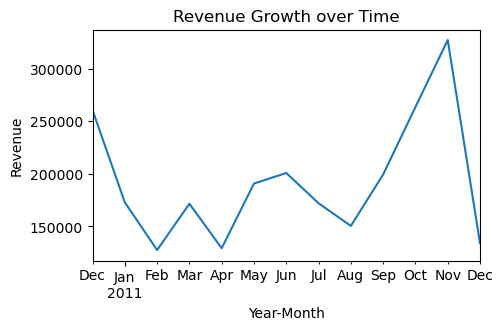

In [48]:
revenue_by_month = df.groupby('YearMonth')['UnitPrice'].sum()
# Plotting revenue growth over time
plt.figure(figsize=(5, 3))
revenue_by_month.plot(kind='line')
plt.xlabel('Year-Month')
plt.ylabel('Revenue')
plt.title('Revenue Growth over Time')
plt.show()

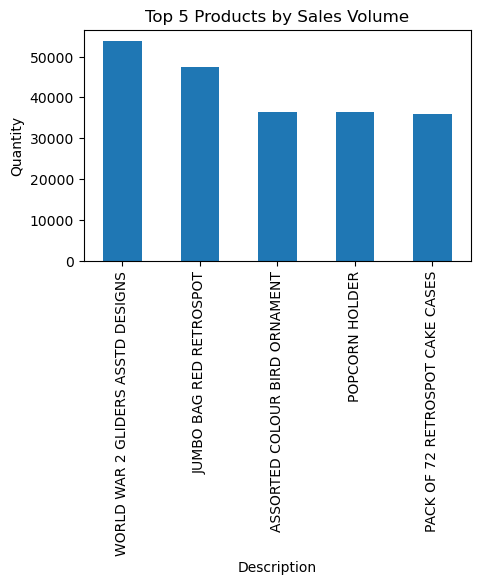

In [49]:
# Question 2: Sales volume by product categories
top_categories = df.groupby('Description')['Quantity'].sum().nlargest(5)

# Plotting sales volume by product categories
plt.figure(figsize=(5, 3))
top_categories.plot(kind='bar')
plt.xlabel('Description')
plt.ylabel('Quantity')
plt.title('Top 5 Products by Sales Volume')
plt.show()

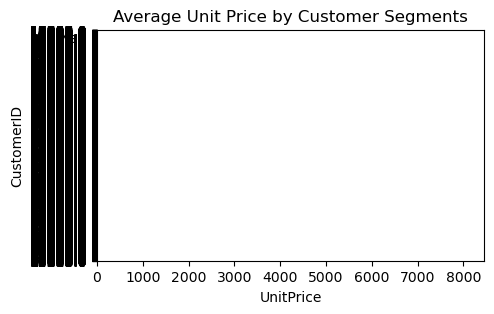

In [50]:
# Question 3: Customer acquisition/retention and profitability by segments
customer_segments = df.groupby('CustomerID')['UnitPrice'].mean().sort_values()

# Plotting profitability by customer segments
plt.figure(figsize=(5, 3))
customer_segments.plot(kind='barh')
plt.xlabel('UnitPrice')
plt.ylabel('CustomerID')
plt.title('Average Unit Price by Customer Segments')
plt.show()

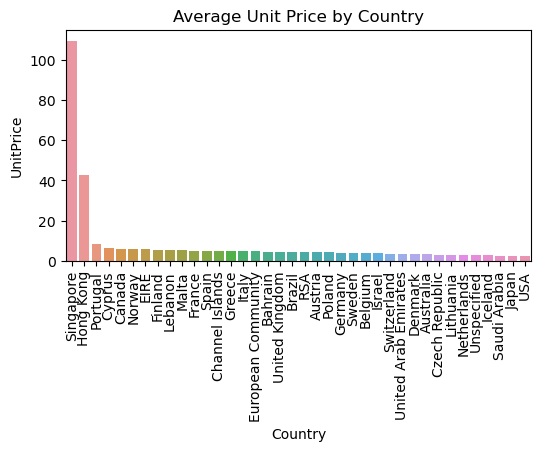

In [51]:
# Question 4: Visualizing market risks or challenges
market_risks = df.groupby('Country')['UnitPrice'].mean().sort_values(ascending=False)

# Plotting market risks by country
plt.figure(figsize=(6, 3))
sns.barplot(x=market_risks.index, y=market_risks.values)
plt.xlabel('Country')
plt.ylabel('UnitPrice')
plt.title('Average Unit Price by Country')
plt.xticks(rotation=90)
plt.show()

# CMO Questions

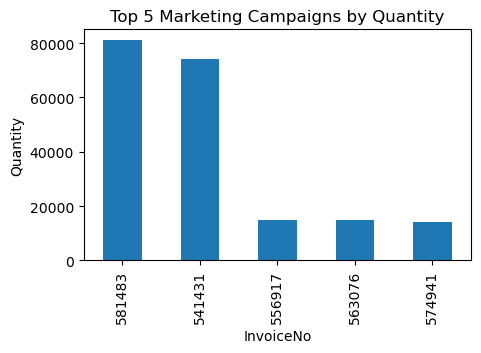

In [52]:
# Question 1: Effectiveness of marketing campaigns and successful channels
campaign_effectiveness = df.groupby('InvoiceNo')['Quantity'].sum().nlargest(5)

# Plotting marketing campaign effectiveness
plt.figure(figsize=(5, 3))
campaign_effectiveness.plot(kind='bar')
plt.xlabel('InvoiceNo')
plt.ylabel('Quantity')
plt.title('Top 5 Marketing Campaigns by Quantity')
plt.show()

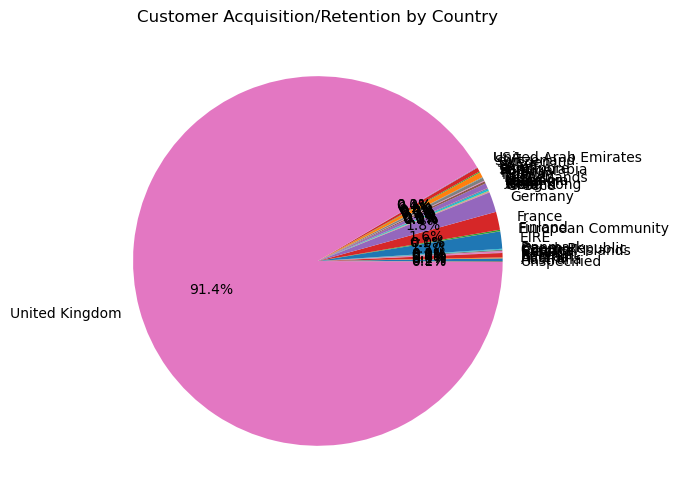

In [69]:
# Question 2: Impact of marketing efforts on customer acquisition/retention by demographics
customer_demographics = df.groupby('Country')['CustomerID'].count()

# Plotting impact of marketing efforts by demographics using a pie chart
plt.figure(figsize=(10, 6))
customer_demographics.plot(kind='pie', autopct='%1.1f%%')
plt.title('Customer Acquisition/Retention by Country')
plt.ylabel('')
plt.show()

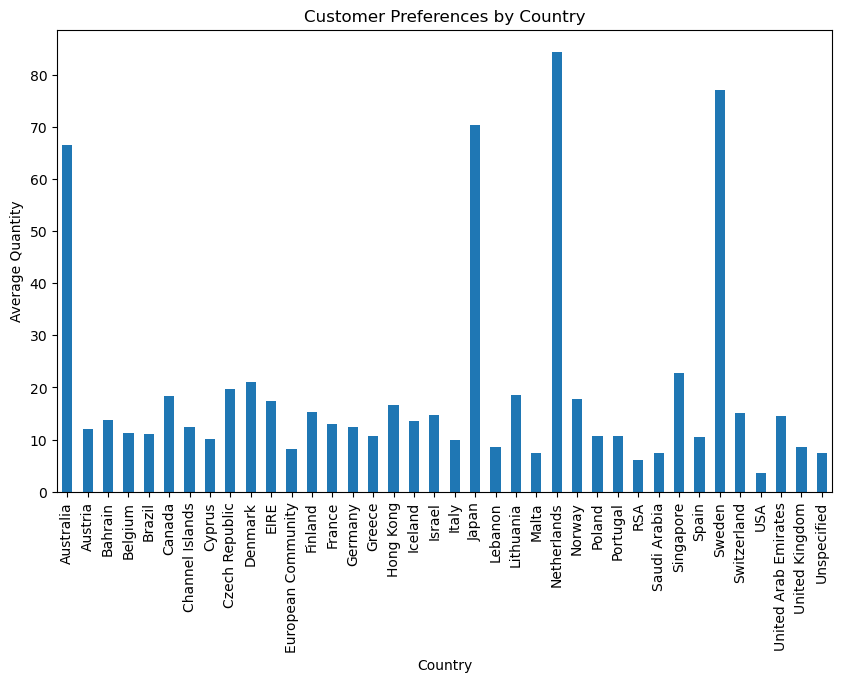

In [70]:
# Question 3: Customer preferences and buying behaviors by region
region_preferences = df.groupby('Country')['Quantity'].mean()

# Plotting customer preferences by region
plt.figure(figsize=(10, 6))
region_preferences.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Average Quantity')
plt.title('Customer Preferences by Country')
plt.show()

In [71]:
# Question 4: Opportunities for brand expansion or diversification
brand_opportunities = df.groupby('StockCode')['Quantity'].sum().nlargest(5)

In [72]:
brand_opportunities

StockCode
22197     56450
84077     53847
85099B    47363
85123A    38830
84879     36221
Name: Quantity, dtype: int64